In [42]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

In [43]:
with open('test_results/achromatic_brute_force.json', 'r') as fp:
    bf_test_results = json.load(fp)

with open('test_results/achromatic_genetic_without_annealing.json', 'r') as fp:
    ga_without_ann_test_results = json.load(fp)
    
with open('test_results/achromatic_genetic_with_annealing.json', 'r') as fp:
    ga_with_ann_test_results = json.load(fp)

In [57]:
data = []
for key in bf_test_results.keys():
    data.append([bf_test_results[key]["nodes_num"],
                 bf_test_results[key]["edges_num"],
                 bf_test_results[key]["achromatic_number"],
                 round(bf_test_results[key]["execution_duration"],3),
                 ga_without_ann_test_results[key]["result"],
                 round(ga_without_ann_test_results[key]["execution_duration"], 3),
                 ga_with_ann_test_results[key]["result"],
                 round(ga_with_ann_test_results[key]["execution_duration"], 3)])
columns = ["NODES", "EDGES","BF_OUT", "BF_TIME", "GA_OUT", "GA_TIME", "GAA_OUT", "GAA_TIME"]
rows = list(bf_test_results.keys())
df = pd.DataFrame(np.array(data),columns=columns).sample(20)
print(df.to_string(index=False))

NODES  EDGES  BF_OUT   BF_TIME  GA_OUT  GA_TIME  GAA_OUT  GAA_TIME
  7.0    0.0     1.0     0.043     1.0    0.022      1.0     0.023
 10.0   29.0     6.0     0.616     6.0    0.275      6.0     0.255
  4.0    0.0     1.0     0.001     1.0    0.015      1.0     0.026
  2.0    1.0     2.0     0.000     2.0    0.017      2.0     0.021
  8.0    6.0     4.0     0.054     4.0    0.078      3.0    79.071
 10.0   34.0     7.0     0.742     6.0   99.525      7.0     0.470
 13.0   55.0     9.0    88.663     9.0   12.028      8.0   164.089
 12.0    4.0     3.0   229.384     3.0    0.038      3.0     0.038
  2.0    0.0     1.0     0.000     1.0    0.020      1.0     0.023
  7.0    6.0     4.0     0.010     4.0    0.020      4.0     0.107
  9.0    4.0     3.0     0.602     3.0    0.027      3.0     0.027
  6.0   14.0     5.0     0.003     5.0    0.017      5.0     0.017
  8.0   12.0     5.0     0.027     5.0    0.110      5.0     0.022
 14.0   52.0     8.0   249.689     7.0  171.753      7.0   169

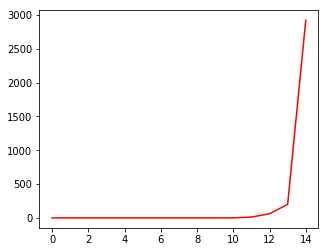

In [77]:
bf_data = list(map(lambda x:int(x["execution_duration"]), list(bf_test_results.values())))
bf_time_data = [0, 0]
for i in range(0, len(bf_data), 5):
    bf_time_data.append((bf_data[i]+bf_data[i+1]+bf_data[i+2]+bf_data[i+3]+bf_data[i+4])/5.0)
plt.plot(bf_time_data, color="red")
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

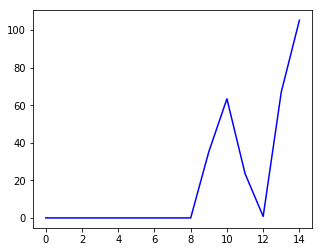

In [101]:
bf_data = list(map(lambda x:int(x["execution_duration"]), list(ga_without_ann_test_results.values())))
bf_time_data = [0, 0]
for i in range(0, len(bf_data), 5):
    bf_time_data.append((bf_data[i]+bf_data[i+1]+bf_data[i+2]+bf_data[i+3]+bf_data[i+4])/5.0)
plt.plot(bf_time_data, color="blue")
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

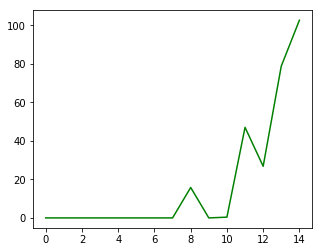

In [115]:
bf_data = list(map(lambda x:int(x["execution_duration"]), list(ga_with_ann_test_results.values())))
bf_time_data = [0, 0]
for i in range(0, len(bf_data), 5):
    bf_time_data.append((bf_data[i]+bf_data[i+1]+bf_data[i+2]+bf_data[i+3]+bf_data[i+4])/5.0)
plt.plot(bf_time_data, color="green")
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

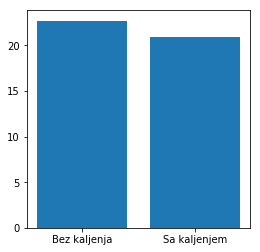

In [136]:
ga_time = list(map(lambda x:int(x["execution_duration"]), list(ga_without_ann_test_results.values())))                                                                                              
ga_time_avg = sum(ga_time) / len(list(ga_without_ann_test_results.values()))

gaa_time = list(map(lambda x:int(x["execution_duration"]), list(ga_with_ann_test_results.values())))                                                                                              
gaa_time_avg = sum(gaa_time) / len(list(ga_with_ann_test_results.values()))

height = [ga_time_avg, gaa_time_avg]
bars = ('Bez kaljenja', 'Sa kaljenjem')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()

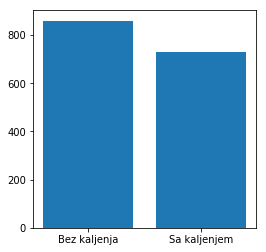

In [137]:
ga = list(map(lambda x:int(x["iterations_num"]), list(ga_without_ann_test_results.values())))                                                                                              
ga_avg = sum(ga) / len(list(ga_without_ann_test_results.values()))

gaa = list(map(lambda x:int(x["iterations_num"]), list(ga_with_ann_test_results.values())))                                                                                              
gaa_avg = sum(gaa) / len(list(ga_with_ann_test_results.values()))

height = [ga_avg, gaa_avg]
bars = ('Bez kaljenja', 'Sa kaljenjem')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()

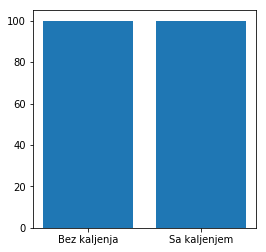

In [142]:
ga = list(map(lambda x:int(x["is_valid"]), list(ga_without_ann_test_results.values())))                                                                                              
ga_avg = len(list(filter(lambda x: x == True, ga))) / len(list(ga_without_ann_test_results.values()))

gaa = list(map(lambda x:int(x["is_valid"]), list(ga_with_ann_test_results.values())))                                                                                              
gaa_avg = len(list(filter(lambda x: x == True, gaa))) / len(list(ga_with_ann_test_results.values()))

height = [ga_avg*100, gaa_avg*100]
bars = ('Bez kaljenja', 'Sa kaljenjem')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()

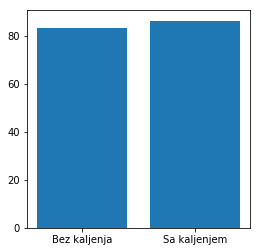

In [143]:
ga = list(map(lambda x:int(x["is_optimal"]), list(ga_without_ann_test_results.values())))                                                                                              
ga_avg = len(list(filter(lambda x: x == True, ga))) / len(list(ga_without_ann_test_results.values()))

gaa = list(map(lambda x:int(x["is_optimal"]), list(ga_with_ann_test_results.values())))                                                                                              
gaa_avg = len(list(filter(lambda x: x == True, gaa))) / len(list(ga_with_ann_test_results.values()))

height = [ga_avg*100, gaa_avg*100]
bars = ('Bez kaljenja', 'Sa kaljenjem')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()